# Diamonds Dataset

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Data preprossing 
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# metrics
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,root_mean_squared_error,r2_score,mean_squared_error


In [2]:
df=sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


`Statistical Analysis`

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
df.duplicated().sum()

146

`About Duplicate Value`
- There are many duplicate values in this data set 
- we can set this by droping these values

In [8]:
df.drop_duplicates().inplace=True

In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [26]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# `Visuallization`

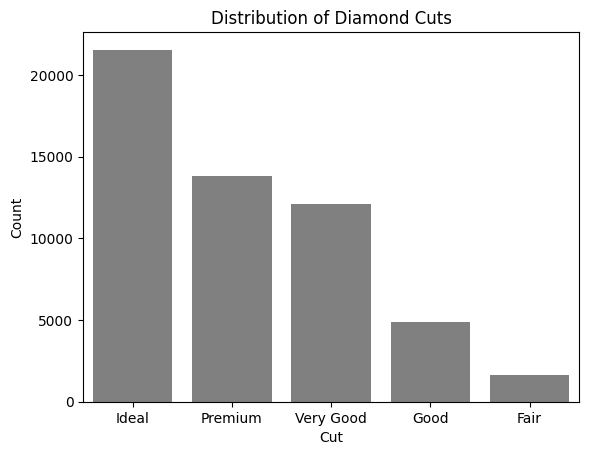

In [22]:
sns.countplot(x=df["cut"], color="gray")
plt.title("Distribution of Diamond Cuts")
plt.xlabel("Cut")
plt.ylabel("Count")
plt.show()

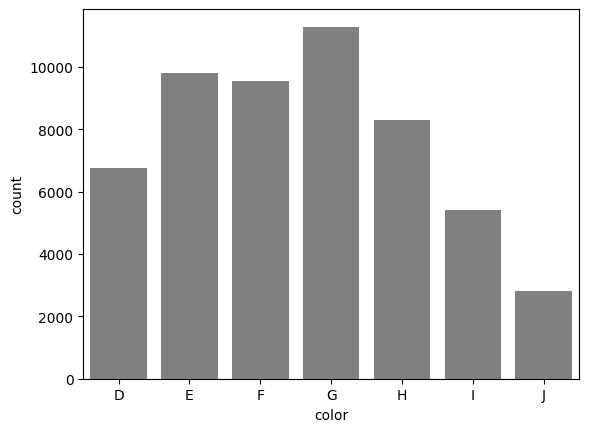

In [28]:
sns.countplot(x=df["color"],color="gray")
plt.show()

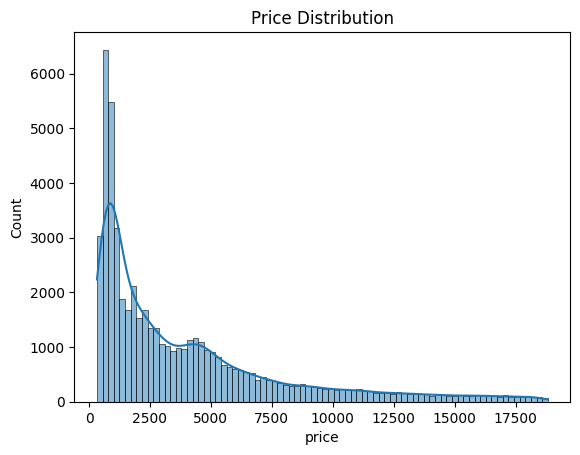

In [25]:
sns.histplot(df["price"],kde=True)
plt.title("Price Distribution")
plt.show()

`Feature Selection`

In [4]:
x=df.drop('price',axis=1)
y=df['price']

`Data Pipeline`

In [ ]:
numeric_feature=['carat','depth','table','x','y','z']
categoric_feature=['cut','color','clarity']

# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

processor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numeric_feature),
        ('cat',OneHotEncoder(),categoric_feature)
    ])

pipeline=Pipeline(
    steps=[
        ('processor',processor),
        ('model',RandomForestRegressor())
    ])

pipeline.fit(x_train,y_train)
y_pred=pipeline.predict(x_test)

print('r2_score: ',r2_score(y_test,y_pred))
print('MAPE: ',mean_absolute_percentage_error(y_test,y_pred))

MSE:  302912.0102705799
r2_score:  0.9809451209350672
MAE:  270.55287626132207
MAPE:  0.0648913261405697
RMSE:  550.3744273406786
